### Exploratory Data Analysis on Spotify Songs
Dataset: https://www.kaggle.com/datasets/geomack/spotifyclassification

Spotify API: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [131]:
sns.set_style("white")

#### Load Dataset

In [132]:
data = pd.read_csv("./spotify_data.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


#### Cleaning Data

In [133]:
data.isna().sum()   # To check for missing values

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [134]:
data.info()     # To better understand the data such as its data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [135]:
data.describe() # Summary statistics of the data

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


 ### Data Analysis

#### Top 5 Most Popular Artists

In [136]:
top_five_artists = data.groupby("artist").count().sort_values(by ='song_title', ascending =False)["song_title"][:5]
# We first group the data by artist name
# Count the number of songs for each artist
# Sort values from highest number of songs to lowest number of songs
# Slice the array to reflect only the top 5
top_five_artists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

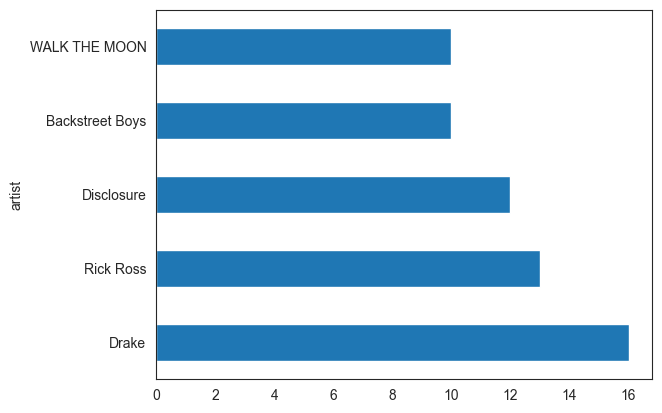

In [137]:
# Bar Chart to show top 5 artists
top_five_artists.plot.barh()
plt.show()

#### Top 5 Loudest Tracks

In [138]:
top_five_loudest = data[['song_title','artist', 'loudness']].sort_values(by = 'loudness', ascending=False)[:5]
# First choose the columns 'song_title', 'artist', 'loudness'
# Sort values by loudness , ascending = False as 0 = loudest, -60 = softest
top_five_loudest

,song_title,artist,loudness
195,GodLovesUgly,Atmosphere,-0.307
636,The Lion - Original Mix,The Partysquad,-0.718
1443,The Wall,Matrix & Futurebound,-0.787
2010,Hey Baby - Steve Aoki Remix,Dimitri Vegas & Like Mike,-0.935
1299,No Absolution,Thy Art Is Murder,-0.994


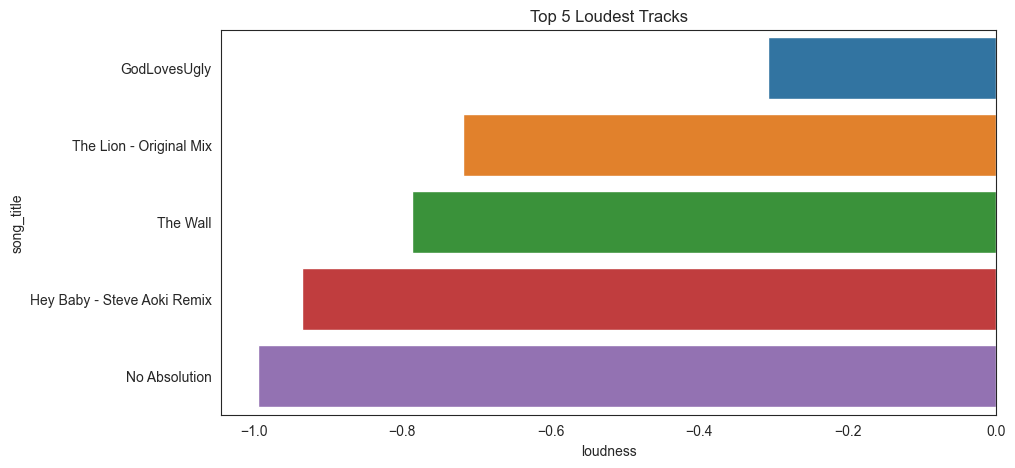

In [139]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'loudness', y='song_title', data=top_five_loudest)
plt.title("Top 5 Loudest Tracks")
plt.show()

#### Artist with Highest Danceability Song

In [140]:
artist_highest_danceability = data[['song_title','artist', 'danceability']].sort_values(by = 'danceability', ascending=False)[:1]
artist_highest_danceability


,song_title,artist,danceability
1433,Flashwind - Radio Edit,Ben Remember,0.984


#### Top 10 Instrumentals

In [141]:
top_ten_instrumentals = data[['song_title', 'artist', 'instrumentalness']].sort_values(by = 'instrumentalness', ascending=False)[:10]
top_ten_instrumentals

,song_title,artist,instrumentalness
1313,Senseless Order,Signs of the Swarm,0.976
271,So Destroyed (channeling Rage Peace),Prince Rama,0.968
1575,A Hundred Dreams from Now,Ray Bryant,0.964
1619,Raven,John Dahlbäck,0.958
725,Strandbar (disko),Todd Terje,0.957
1546,Almas vaggvisa,Jan Lundgren Trio,0.956
1322,Pitchblack,Walking Dead On Broadway,0.955
1349,Prismatic Abyss,Aversions Crown,0.954
1661,Yebisah,Mark Knight,0.954
121,Chasing Heaven,Bassnectar,0.952


#### Most Common Durations

In [142]:
def convert_to_minutes_seconds(milliseconds):
    seconds = round(milliseconds * 10 ** -3)
    minutes, seconds = divmod(seconds, 60)
    return f"{minutes:02d}:{seconds:02d}"


data['duration'] = data['duration_ms'].apply(convert_to_minutes_seconds)
most_common_durations = data.groupby('duration').count().sort_values(by = 'song_title', ascending = False)['song_title'][:10]
most_common_durations

duration
03:26    24
03:38    24
03:33    23
03:21    23
03:08    23
03:45    22
03:15    22
03:44    22
03:50    22
03:27    21
Name: song_title, dtype: int64

#### Plots for Audio Features

In [143]:
feature_cols = ['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo','valence']

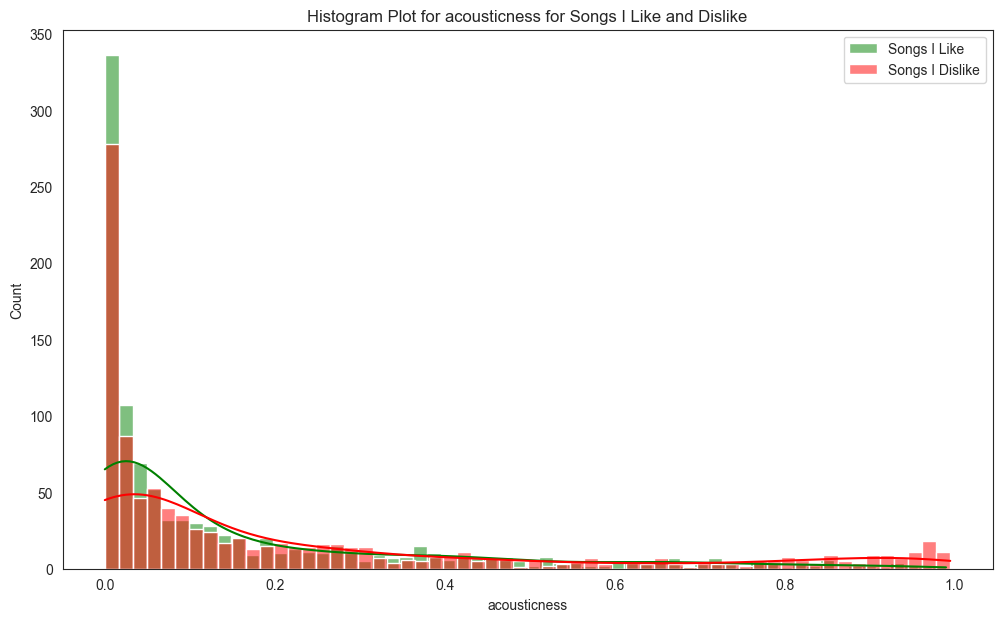

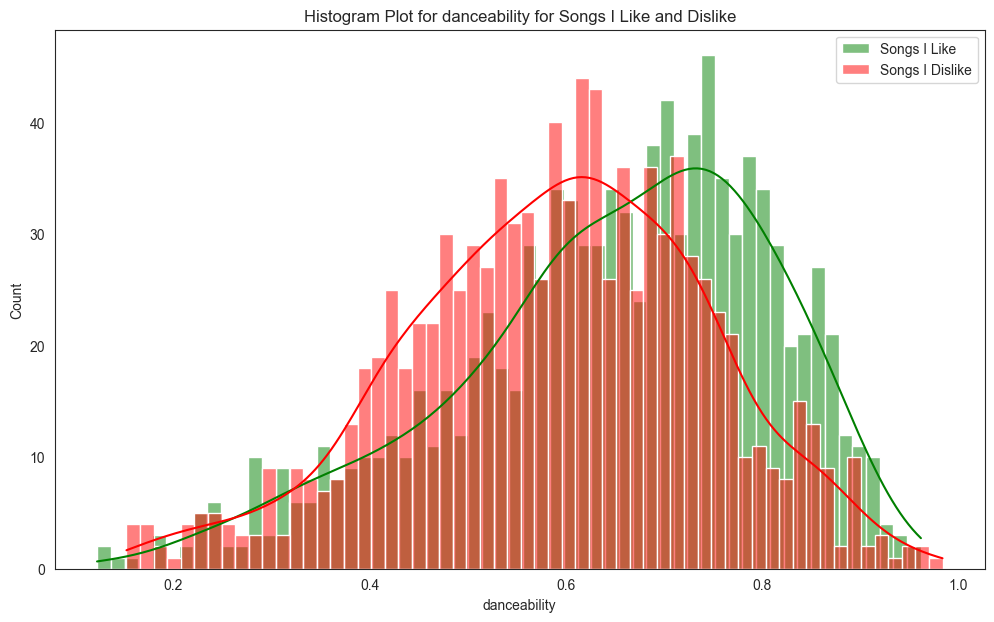

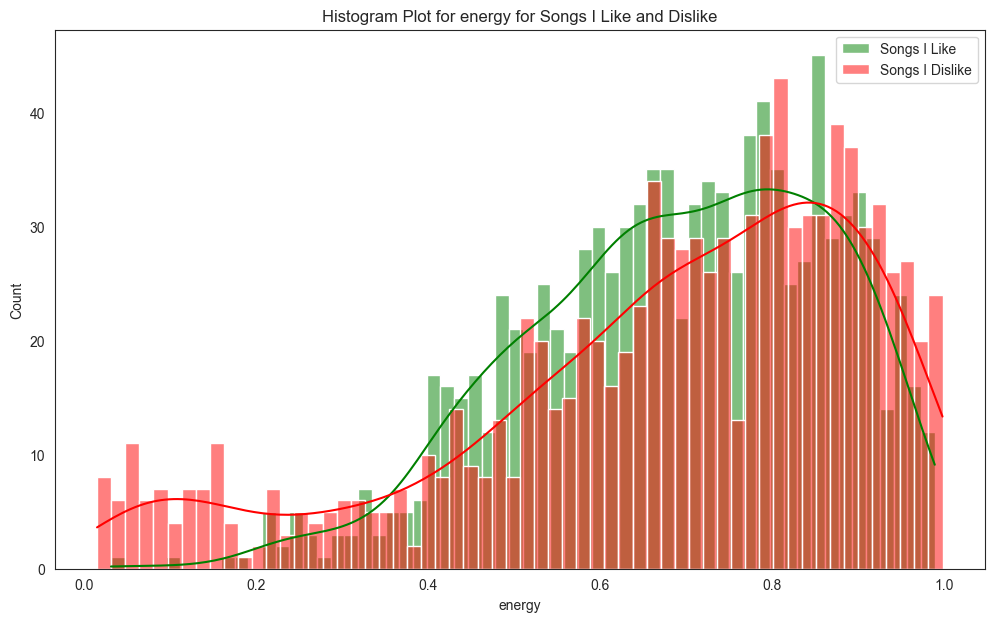

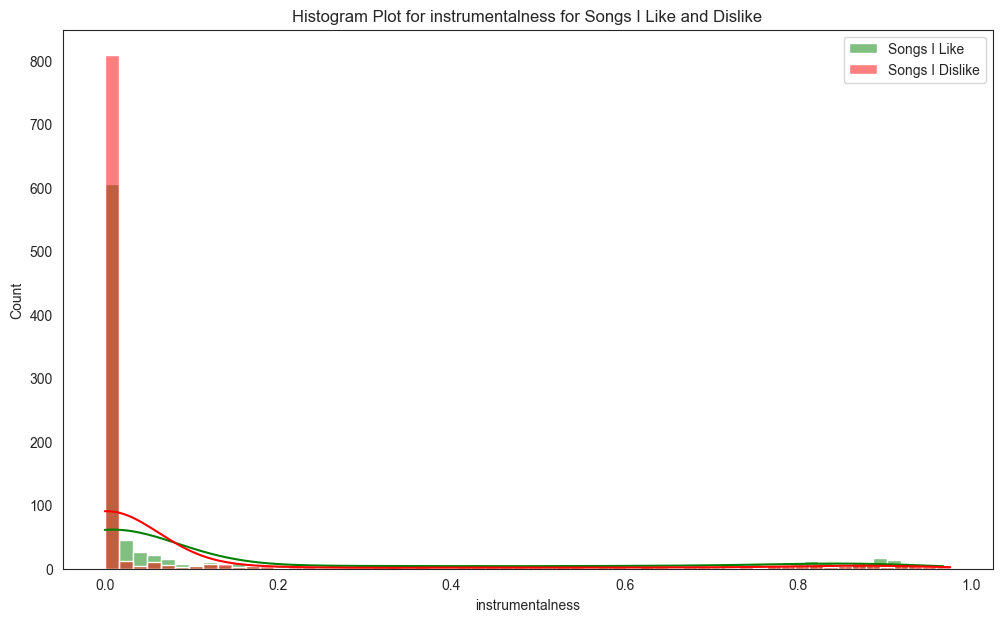

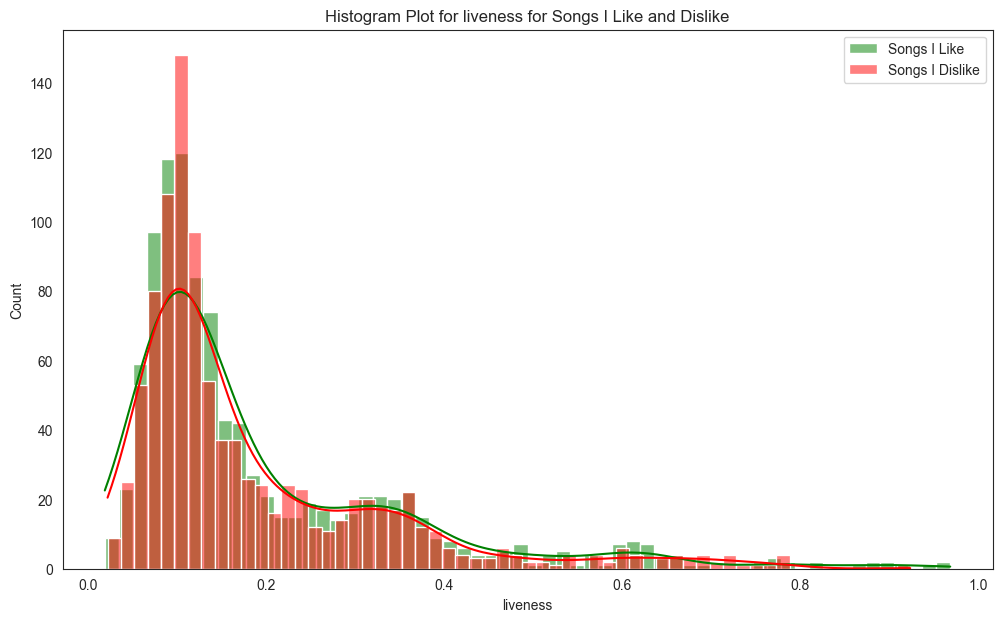

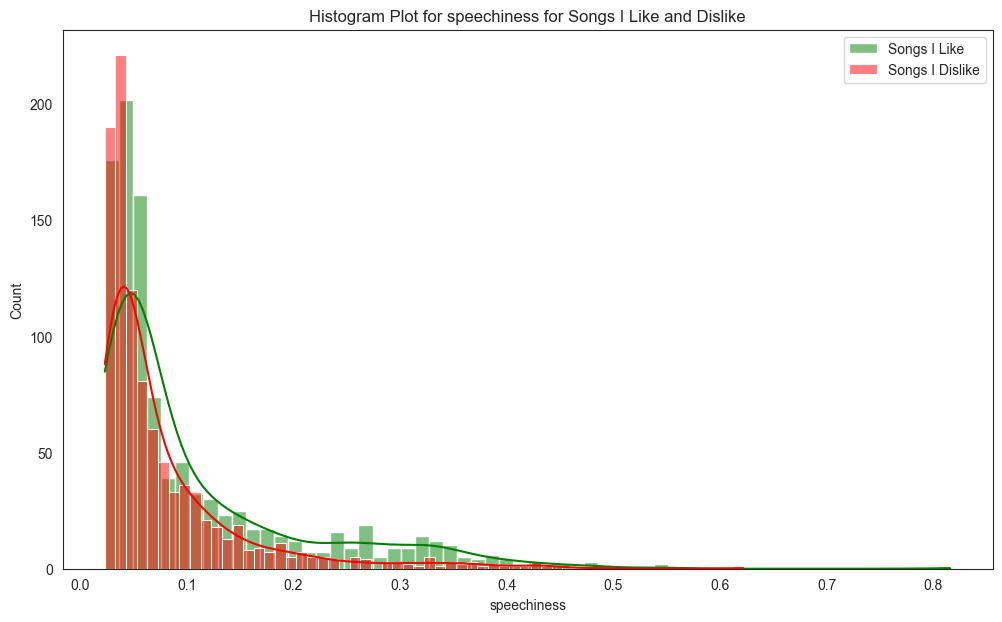

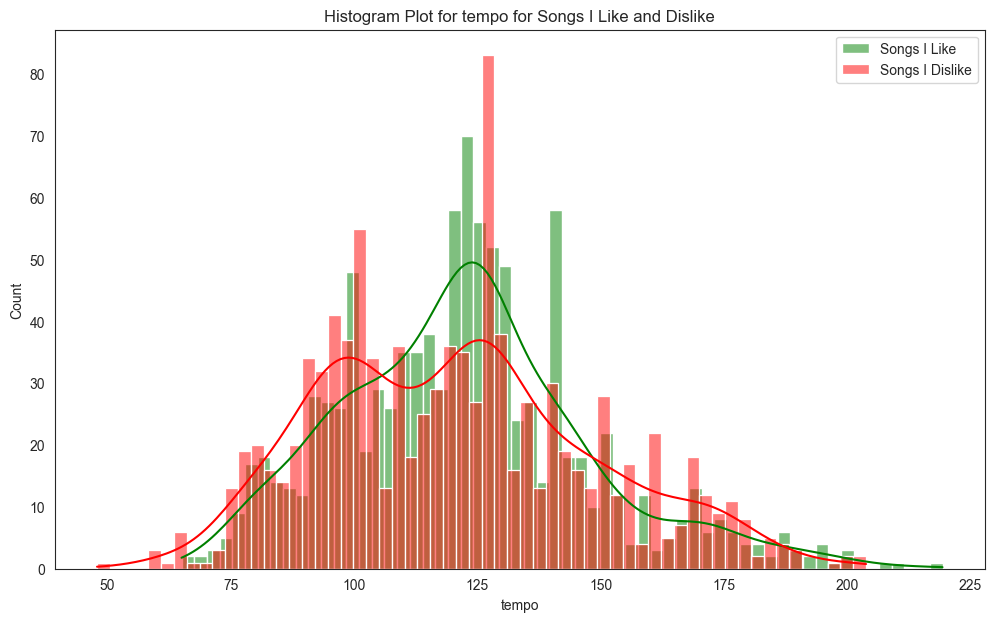

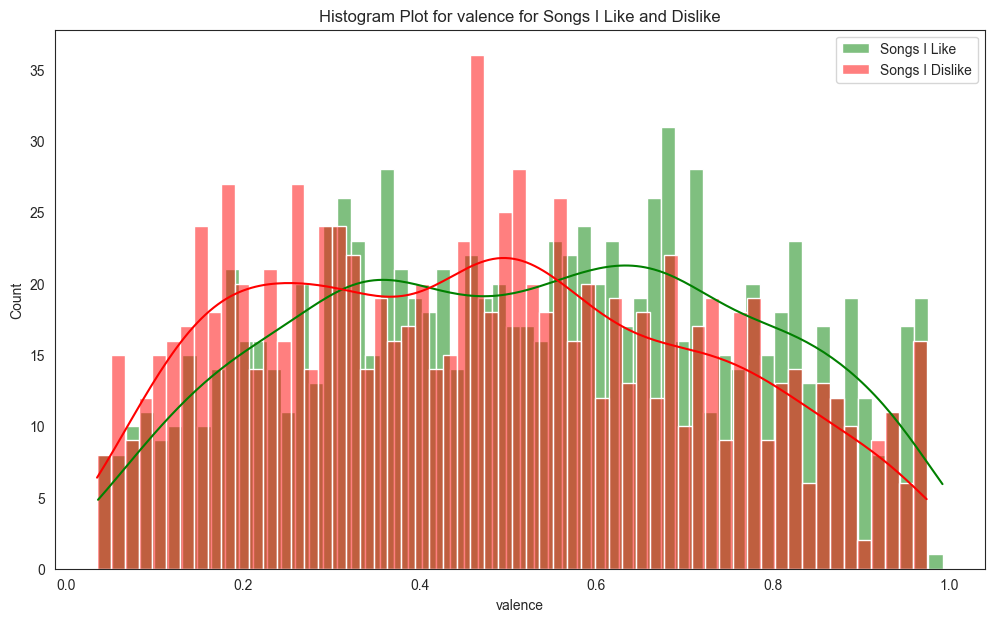

In [144]:
for c in feature_cols:
    like_data = data[data["target"] == 1][c]   # target = 1 indicates that I like the song
    dislike_data = data[data["target"] == 0][c] # target = 0 indicates I dislike the song

    plt.figure(figsize=(12,7))

    sns.histplot(like_data, bins=60, label="Songs I Like", color = 'green', kde = True)
    sns.histplot(dislike_data, bins = 60, label="Songs I Dislike", color = 'red', kde=True)

    plt.legend(loc = 'upper right')
    plt.title(f"Histogram Plot for {c} for Songs I Like and Dislike")
    plt.show()
